# Gradient Boosting: Regression

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize GradientBoostingRegressor
model = GradientBoostingRegressor(
    n_estimators=200,  # Number of boosting stages
    learning_rate=0.1,  # Learning rate
    max_depth=4,        # Maximum depth of each tree
    min_samples_split=2,  # Minimum samples required to split a node
    random_state=42     # Random seed for reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)


print(f"R^2 Score: {r2:.2f}")

# Feature Importance
feature_importance = model.feature_importances_
feature_names = california.feature_names

print("\nFeature Importance:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance:.4f}")

R^2 Score: 0.82

Feature Importance:
MedInc: 0.5751
HouseAge: 0.0424
AveRooms: 0.0233
AveBedrms: 0.0090
Population: 0.0074
AveOccup: 0.1282
Latitude: 0.1035
Longitude: 0.1111


# Gradient Boosting for Classification

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 2 69]]


# Feature Importance

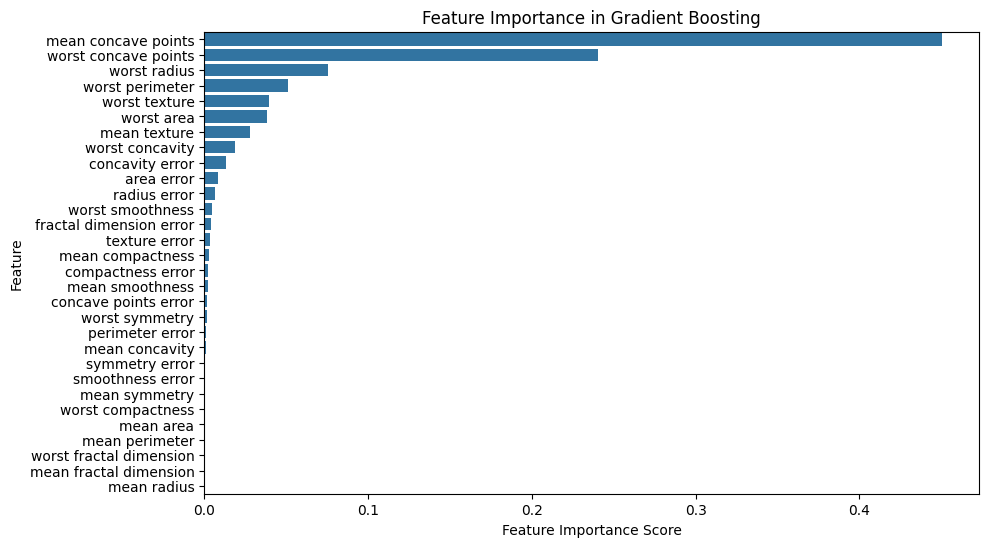

In [7]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importance
feature_importance = model.feature_importances_

# Convert to DataFrame
importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Gradient Boosting")
plt.show()

In [9]:
importance_df 

,Feature,Importance
7,mean concave points,0.450528
27,worst concave points,0.240103
20,worst radius,0.075589
22,worst perimeter,0.051408
21,worst texture,0.039886
23,worst area,0.038245
1,mean texture,0.027805
26,worst concavity,0.018725
16,concavity error,0.013068
13,area error,0.008415
